In [4]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [7]:
# Loading the datasets
df1=pd.read_csv("Data_of_Attack_Back.csv")
df2=pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
df3=pd.read_csv("Data_of_Attack_Back_FTPWrite.csv")
df4=pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
df5=pd.read_csv("Data_of_Attack_Back_Neptune.csv")
df6=pd.read_csv("Data_of_Attack_Back_NMap.csv")
df7=pd.read_csv("Data_of_Attack_Back_Normal.csv")
df8=pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
df9=pd.read_csv("Data_of_Attack_Back_RootKit.csv")
df10=pd.read_csv("Data_of_Attack_Back_Satan.csv")
df11=pd.read_csv("Data_of_Attack_Back_Smurf.csv")

In [8]:
# Add a column to identify the source of each row

df1["Attack"]="Back"
df2["Attack"]="ButterOverflow"
df3["Attack"]="FTPWrite"
df4["Attack"]="GuessPassword"
df5["Attack"]="Neptune"
df6["Attack"]="NMap"
df7["Attack"]="Normal"
df8["Attack"]="PortSweep"
df9["Attack"]="RootKit"
df10["Attack"]="Satan"
df11["Attack"]="Smurf"

In [9]:
# Combine all dataframes into a single dataframe
attack_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
attack_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0.0,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
attack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817550 entries, 0 to 3006
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-null  floa

#### Columns from index 42 to 82 have only 7 non-null values, making them nearly empty and likely irrelevant.

In [15]:
attack_df=attack_df.drop(columns=attack_df.columns[42:83])
attack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817550 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-null  floa

In [22]:
attack_df[["Attack"]]

,Attack
0,Back
1,Back
2,Back
3,Back
4,Back
...,...
3002,Smurf
3003,Smurf
3004,Smurf
3005,Smurf


In [24]:
attack_df.isna().sum()

duration                        7
 protocol_type                  7
 service                        7
 flag                           7
 src_bytes                      7
 dst_bytes                      7
 land                           7
 wrong_fragment                 7
 urgent                         7
 hot                            7
 num_failed_logins              7
 logged_in                      7
 num_compromised                7
 root_shell                     7
 su_attempted                   7
 num_root                       7
 num_file_creations             7
 num_shells                     7
 num_access_files               7
 num_outbound_cmds              7
 is_host_login                  7
 is_guest_login                 7
 count                          7
 srv_count                      7
 serror_rate                    7
 srv_error_rate                 7
 rerror_rate                    7
 srv_rerror_rate                7
 same_srv_rate                  7
 diff_srv_rate

In [26]:
attack_df=attack_df.dropna()
attack_df.isna().sum()

duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [28]:
attack_df.shape

(817543, 42)

In [30]:
attack_df.dtypes

duration                        float64
 protocol_type                  float64
 service                        float64
 flag                           float64
 src_bytes                      float64
 dst_bytes                      float64
 land                           float64
 wrong_fragment                 float64
 urgent                         float64
 hot                            float64
 num_failed_logins              float64
 logged_in                      float64
 num_compromised                float64
 root_shell                     float64
 su_attempted                   float64
 num_root                       float64
 num_file_creations             float64
 num_shells                     float64
 num_access_files               float64
 num_outbound_cmds              float64
 is_host_login                  float64
 is_guest_login                 float64
 count                          float64
 srv_count                      float64
 serror_rate                    float64


In [34]:
attack_df.columns=attack_df.columns.str.strip()
attack_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [31]:
attack_df["Attack"].value_counts()

Attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
ButterOverflow        30
RootKit               10
Name: count, dtype: int64

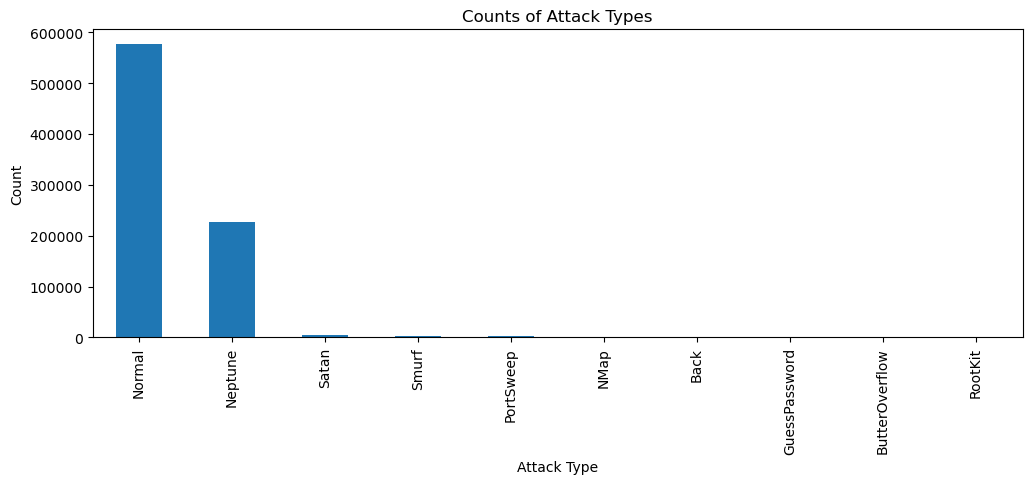

In [37]:
plt.figure(figsize=(12, 4))
attack_df["Attack"].value_counts().plot(kind="bar")
plt.title("Counts of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()

In [41]:
attack_df["flag"].value_counts()

flag
0.00    570811
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.10       298
0.09       122
0.01        97
0.04        40
0.03        19
Name: count, dtype: int64

In [43]:
#Set a threshold to convert values to 0 and 1
threshold=0.05
attack_df["flag"]=attack_df["flag"].apply(lambda x: 0 if x < threshold else 1)

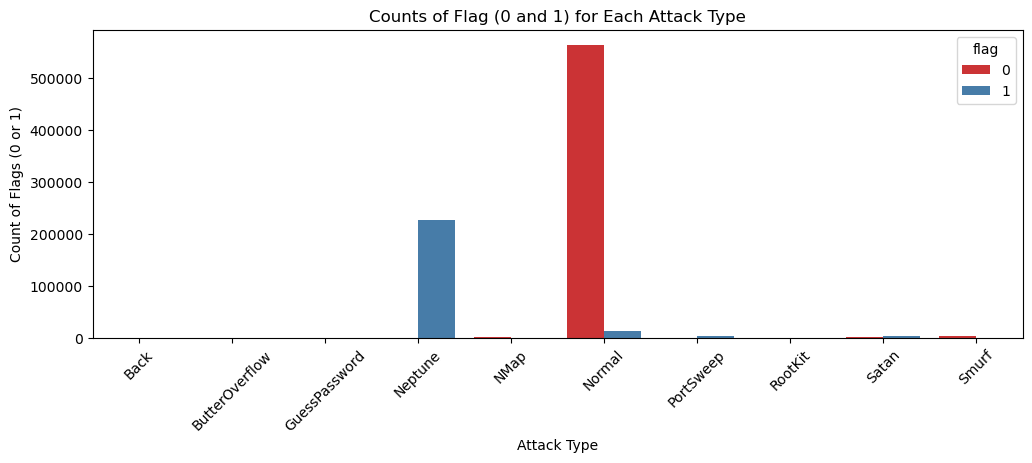

In [45]:
plt.figure(figsize=[12,4])
sns.countplot(x="Attack",hue="flag",data=attack_df,palette="Set1")
plt.title("Counts of Flag (0 and 1) for Each Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Count of Flags (0 or 1)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

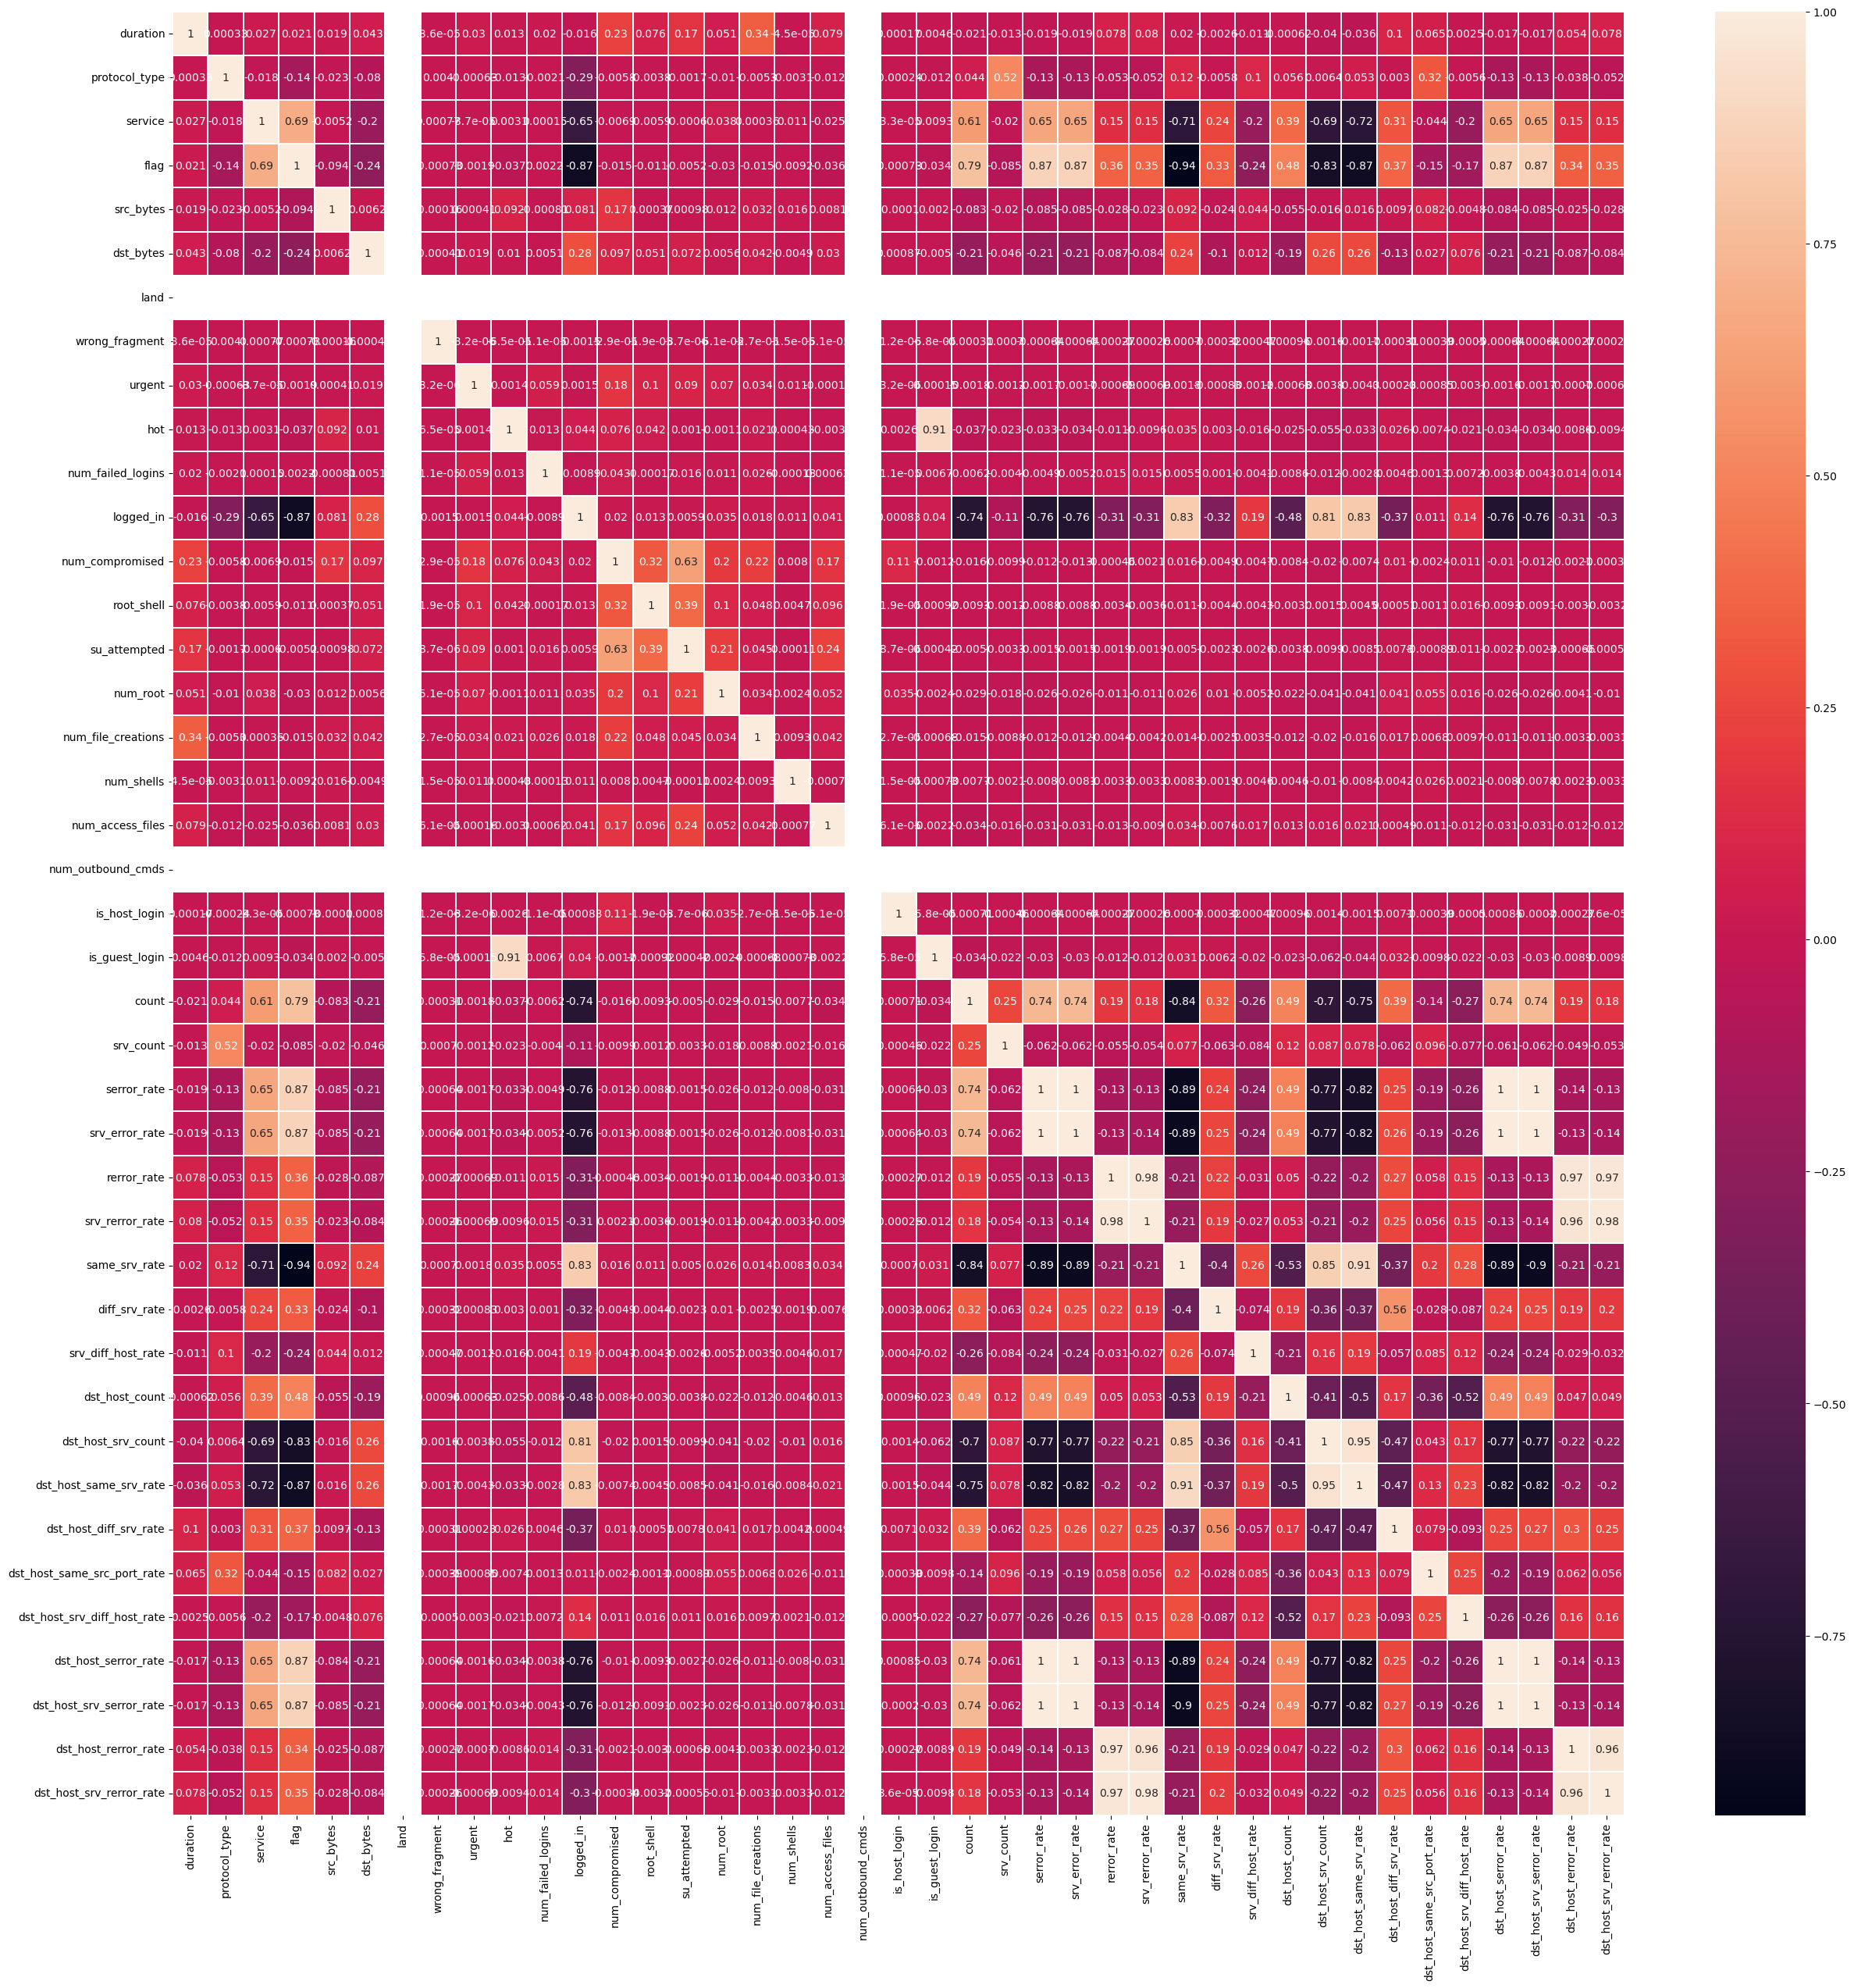

In [47]:
attack_df_num=attack_df.drop(columns=["Attack"])
plt.figure(figsize=[30,30])
sns.heatmap(attack_df_num.corr(),annot=True,linewidths=0.1)
plt.show()

# Binomial Classification

In [50]:
attack_df["Binary_Attack"]=attack_df["Attack"].apply(lambda x:0 if x=="Normal" else 1)

In [52]:
attack_df["Binary_Attack"].value_counts()

Binary_Attack
0    576710
1    240833
Name: count, dtype: int64

# Train Test Split:

In [56]:
X=attack_df.drop(columns=["Attack","Binary_Attack"])      # Features
y=attack_df["Binary_Attack"]                              # Target

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train Shape: (572280, 41)
X_test Shape: (245263, 41)
y_train: (572280,)
y_test: (245263,)


### 1.Logistic Regression

In [72]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [67]:
# Train the Model
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [74]:
lr_pred_y=lr_model.predict(X_test_scaled)

In [76]:
# Accuracy
accuracy=accuracy_score(y_test,lr_pred_y)*100
# Precision, Recall, F1-Score
report=classification_report(y_test, lr_pred_y)
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, lr_pred_y)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 99.77004277041381
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172988
           1       1.00      1.00      1.00     72275

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[172781    207]
 [   357  71918]]


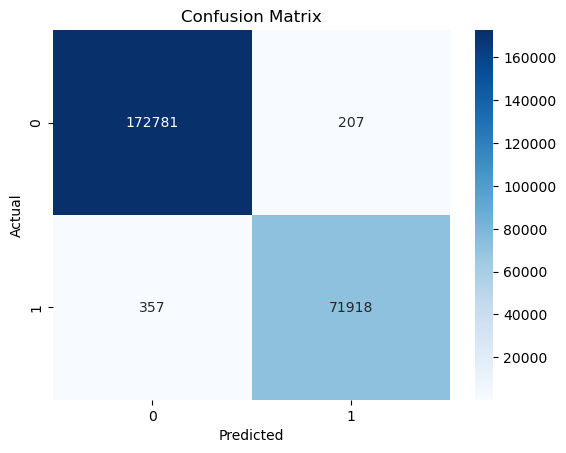

In [78]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2.Random Forest

In [83]:
# Train the Model
rf_model=RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [92]:
# Predict on the test data
rf_pred_y=rf_model.predict(X_test_scaled)

In [98]:
# Accuracy
accuracy=accuracy_score(y_test,rf_pred_y)*100
# Precision, Recall, F1-Score
report=classification_report(y_test, rf_pred_y)
# Confusion Matrix
conf_matrix_rf=confusion_matrix(y_test, rf_pred_y)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n",rf_conf_matrix)

Accuracy: 99.98246779987198
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172988
           1       1.00      1.00      1.00     72275

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[172987      1]
 [    42  72233]]


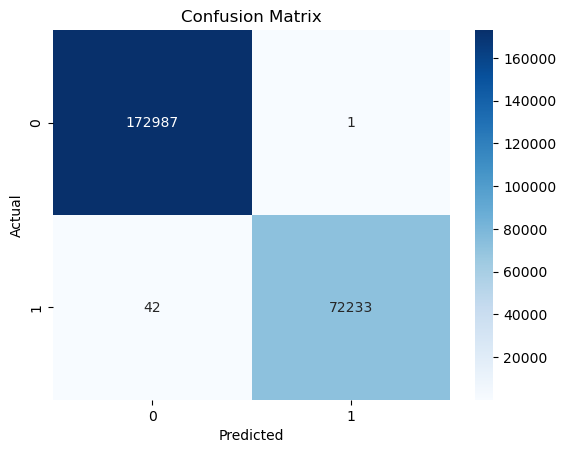

In [96]:
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3.Support Vector Machine (SVM)

In [102]:
# Initialize SVM model
svm_model=SVC()
# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC()

In [105]:
# Predict on the test data
svm_pred_y=svm_model.predict(X_test_scaled)

In [108]:
# Accuracy
accuracy=accuracy_score(y_test,svm_pred_y)*100
# Precision, Recall, F1-Score
report=classification_report(y_test, svm_pred_y)
# Confusion Matrix
svm_conf_matrix=confusion_matrix(y_test, svm_pred_y)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n",svm_conf_matrix)

Accuracy: 99.94618022286281
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    172988
           1       1.00      1.00      1.00     72275

    accuracy                           1.00    245263
   macro avg       1.00      1.00      1.00    245263
weighted avg       1.00      1.00      1.00    245263

Confusion Matrix:
 [[172974     14]
 [   118  72157]]


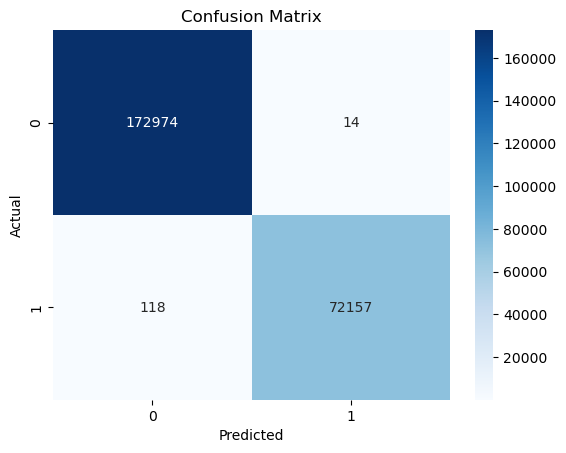

In [109]:
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Multinomial Classification

In [113]:
attack_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack',
       'Binary_Attack'],
      dtype='object')

In [115]:
attack_df=attack_df.drop(columns=["Binary_Attack"])

## Label Encoder

In [118]:
label_encoder=LabelEncoder()

In [126]:
attack_df["attack_encoded"]=label_encoder.fit_transform(attack_df["Attack"])

In [128]:
attack_df["attack_encoded"].value_counts()

attack_encoded
5    576710
4    227228
8      5019
9      3007
6      2964
3      1554
0       968
2        53
1        30
7        10
Name: count, dtype: int64

## Features and Target

In [131]:
X=attack_df.drop(columns=["Attack","attack_encoded"])
y=attack_df["attack_encoded"]

### Train Test Split

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train Shape: (572280, 42)
X_test Shape: (245263, 42)
y_train: (572280,)
y_test: (245263,)


### Standard Scaler

In [155]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### 1.Logistic Regression

In [158]:
lr_model=LogisticRegression(multi_class="multinomial",solver="lbfgs")
#Fitting the Model
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(multi_class='multinomial')

In [162]:
#Make predictions on the test set
y_pred_lr=lr_model.predict(X_test_scaled)

In [164]:
# Accuracy
accuracy=accuracy_score(y_test,y_pred_lr)*100
# Precision, Recall, F1-Score
report=classification_report(y_test,y_pred_lr,target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 99.99306866506566
Classification Report:
                 precision    recall  f1-score   support

          Back       1.00      1.00      1.00       276
ButterOverflow       1.00      1.00      1.00        12
 GuessPassword       0.93      1.00      0.96        13
          NMap       1.00      1.00      1.00       451
       Neptune       1.00      1.00      1.00     68179
        Normal       1.00      1.00      1.00    172988
     PortSweep       1.00      1.00      1.00       922
       RootKit       0.00      0.00      0.00         3
         Satan       0.99      1.00      1.00      1511
         Smurf       1.00      1.00      1.00       908

      accuracy                           1.00    245263
     macro avg       0.89      0.90      0.90    245263
  weighted avg       1.00      1.00      1.00    245263



In [168]:
# Confusion Matrix
lr_conf_matrix=confusion_matrix(y_test,y_pred_lr,labels=lr_model.classes_)
print("Confusion Matrix:\n")
lr_conf_matrix

Confusion Matrix:



array([[   276,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,     12,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,     13,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,    451,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  68179,      0,      0,      0,
             0,      0],
       [     0,      0,      1,      0,      0, 172983,      0,      1,
             3,      0],
       [     0,      0,      0,      0,      0,      2,    919,      0,
             1,      0],
       [     0,      0,      0,      0,      0,      1,      0,      0,
             2,      0],
       [     0,      0,      0,      0,      0,      0,      2,      0,
          1507,      2],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             2,    906]], dtype=int64)

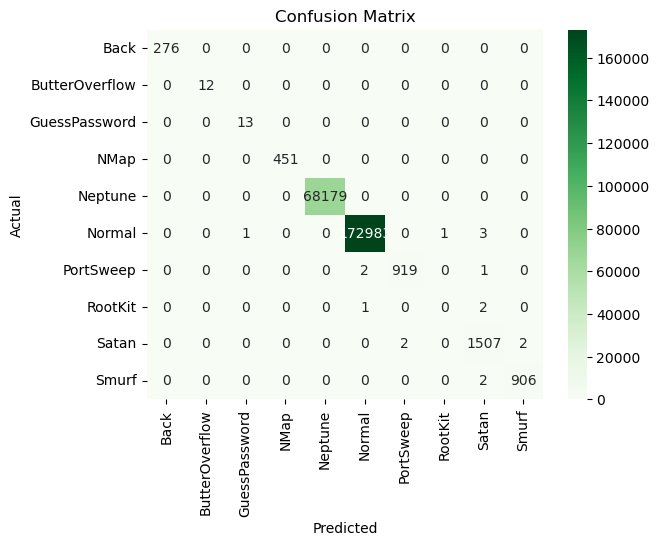

In [170]:
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2.Random Forest

In [173]:
rf_model=RandomForestClassifier()
# Fitting the Model
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [175]:
#Make predictions on the test set
y_pred_rf=rf_model.predict(X_test_scaled)

In [176]:
# Accuracy
accuracy=accuracy_score(y_test,y_pred_rf)*100
# Precision, Recall, F1-Score
report=classification_report(y_test,y_pred_rf,target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 99.99633046974064
Classification Report:
                 precision    recall  f1-score   support

          Back       1.00      1.00      1.00       276
ButterOverflow       1.00      0.92      0.96        12
 GuessPassword       1.00      1.00      1.00        13
          NMap       1.00      1.00      1.00       451
       Neptune       1.00      1.00      1.00     68179
        Normal       1.00      1.00      1.00    172988
     PortSweep       1.00      1.00      1.00       922
       RootKit       0.00      0.00      0.00         3
         Satan       1.00      1.00      1.00      1511
         Smurf       1.00      1.00      1.00       908

      accuracy                           1.00    245263
     macro avg       0.90      0.89      0.90    245263
  weighted avg       1.00      1.00      1.00    245263



In [179]:
# Confusion Matrix
rf_conf_matrix=confusion_matrix(y_test,y_pred_rf,labels=rf_model.classes_)
print("Confusion Matrix:\n")
rf_conf_matrix

Confusion Matrix:



array([[   276,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,     11,      0,      0,      0,      1,      0,      0,
             0,      0],
       [     0,      0,     13,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,    451,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  68178,      1,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0, 172988,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      1,    921,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      2,      0,      0,
             1,      0],
       [     0,      0,      0,      0,      0,      0,      3,      0,
          1508,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    908]], dtype=int64)

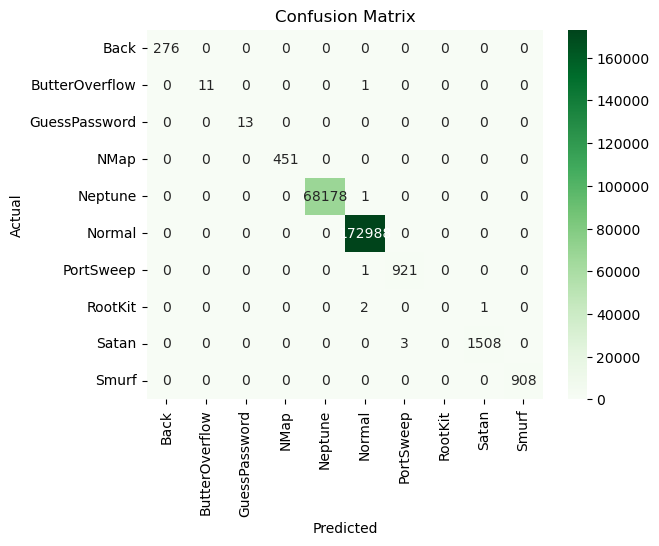

In [181]:
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3.Support Vector Machine

In [184]:
svm_model=SVC(decision_function_shape="ovo")
#Fitting the Model
svm_model.fit(X_train_scaled,y_train)

SVC(decision_function_shape='ovo')

In [185]:
#Make predictions on the test set
y_pred_svm=svm_model.predict(X_test_scaled)

In [186]:
# Accuracy
accuracy=accuracy_score(y_test,y_pred_svm)*100
# Precision, Recall, F1-Score
report=classification_report(y_test,y_pred_svm,target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 99.99225321389692
Classification Report:
                 precision    recall  f1-score   support

          Back       1.00      1.00      1.00       276
ButterOverflow       1.00      0.58      0.74        12
 GuessPassword       1.00      1.00      1.00        13
          NMap       1.00      1.00      1.00       451
       Neptune       1.00      1.00      1.00     68179
        Normal       1.00      1.00      1.00    172988
     PortSweep       1.00      1.00      1.00       922
       RootKit       0.00      0.00      0.00         3
         Satan       1.00      1.00      1.00      1511
         Smurf       1.00      1.00      1.00       908

      accuracy                           1.00    245263
     macro avg       0.90      0.86      0.87    245263
  weighted avg       1.00      1.00      1.00    245263



In [187]:
# Confusion Matrix
svm_conf_matrix=confusion_matrix(y_test,y_pred_svm,labels=svm_model.classes_)
print("Confusion Matrix:\n")
svm_conf_matrix

Confusion Matrix:



array([[   276,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      7,      0,      0,      0,      5,      0,      0,
             0,      0],
       [     0,      0,     13,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,    450,      0,      1,      0,      0,
             0,      0],
       [     0,      0,      0,      0,  68176,      3,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0, 172988,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      2,    920,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      1,      0,      0,
             2,      0],
       [     0,      0,      0,      0,      0,      2,      3,      0,
          1506,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,    908]], dtype=int64)

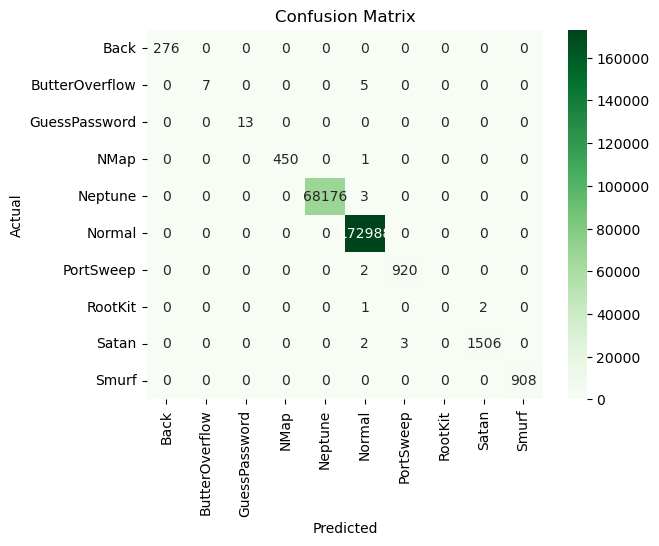

In [188]:
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()